In [418]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [419]:
dataset = pd.read_csv('diabetes.csv')
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [420]:
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']
for column in zero_not_accepted:
    dataset[column] = dataset[column].replace(0, np.NaN)
    mean = int(dataset[column].mean(skipna=True))
    dataset[column] = dataset[column].replace(np.NaN, mean)

In [421]:
    X = dataset[['Glucose', 'Age' ]].to_numpy()

    y = dataset['Outcome'].to_numpy()

In [422]:
from sklearn.model_selection import train_test_split

In [423]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

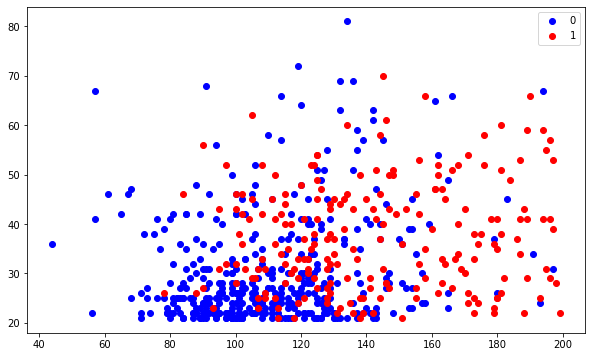

In [424]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='b', label='0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='r', label='1')
plt.legend();

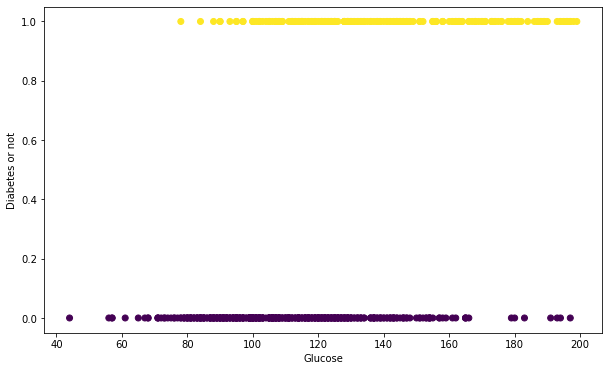

In [425]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], y_train, c = y_train)
plt.xlabel("Glucose")
plt.ylabel("Diabetes or not")
plt.show()

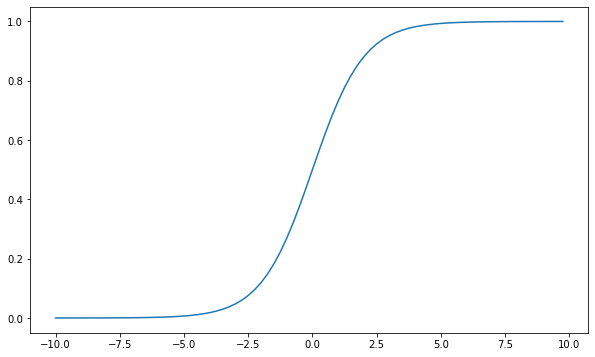

In [426]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

domain = np.arange(-10, 10, .25)
plt.figure(figsize=(10, 6))
plt.plot(domain, sigmoid(domain))

In [427]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [428]:
model = LogisticRegression(lr=0.001, num_iter=10000)

In [429]:
model.fit(X_train, y_train)

In [430]:
preds = model.predict(X_train)
(preds == y_train).mean()

0.3811074918566775

In [431]:
model.theta

array([-0.51040802,  0.01522073, -0.02003503])

614 614


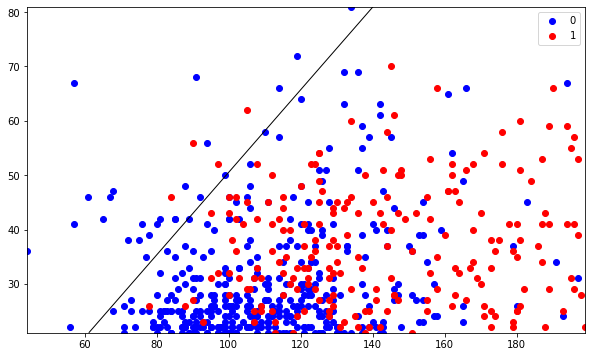

In [432]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='b', label='0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');
print(len(X_train), len(y_train))

154 154


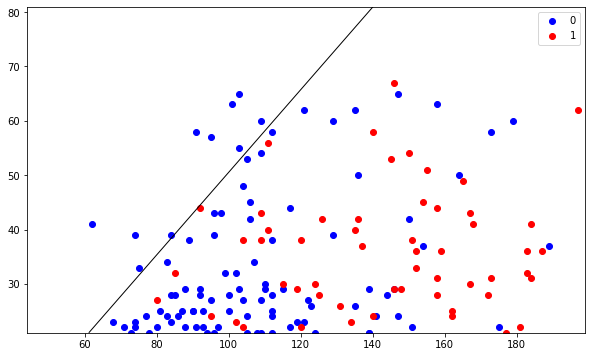

In [433]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='b', label='0')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');
print(len(X_test), len(y_test))

In [434]:
from sklearn.linear_model import LogisticRegression

In [435]:
model = LogisticRegression(C=1e20)

In [436]:
model.fit(X_train, y_train)

LogisticRegression(C=1e+20)

In [437]:
preds = model.predict(X_train)
(preds == y_train).mean()

0.7345276872964169

In [438]:
model.intercept_, model.coef_

(array([-6.50856495]), array([[0.03782042, 0.03390348]]))

In [439]:
from sklearn.metrics import classification_report

In [440]:
prediction = model.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82        99
           1       0.70      0.56      0.63        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.76      0.75       154

